In [24]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
%matplotlib inline


from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

In [25]:
calories = pd.read_csv("/kaggle/input/calories-burning-dataset/calories.csv")
exercise = pd.read_csv("/kaggle/input/calories-burning-dataset/exercise.csv")

In [26]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [27]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [28]:
data = pd.merge(calories, exercise, on = 'User_ID')

In [29]:
data

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [31]:
round(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,14977359.0,2872851.0,10001159.0,12474191.0,14997285.0,17449279.0,19999647.0
Calories,15000.0,90.0,62.0,1.0,35.0,79.0,138.0,314.0
Age,15000.0,43.0,17.0,20.0,28.0,39.0,56.0,79.0
Height,15000.0,174.0,14.0,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,75.0,15.0,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,16.0,8.0,1.0,8.0,16.0,23.0,30.0
Heart_Rate,15000.0,96.0,10.0,67.0,88.0,96.0,103.0,128.0
Body_Temp,15000.0,40.0,1.0,37.0,40.0,40.0,41.0,42.0


In [32]:
data.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [33]:
data.duplicated().any()

False

In [34]:
data['Gender'] = data['Gender'].map({'male': 1, 'female': 0})

In [37]:
data

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,1,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,0,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,1,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,0,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,0,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,0,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,0,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,1,78,193.0,97.0,2.0,84.0,38.3


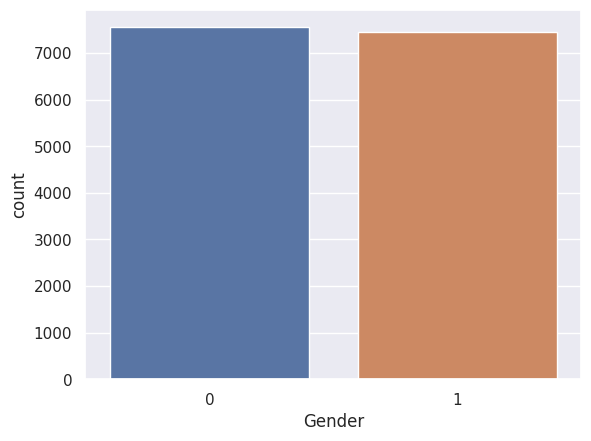

In [39]:
sns.set()
sns.countplot(x='Gender', data=data)
plt.show()

<ipython-input-36-ec135ce2bd5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

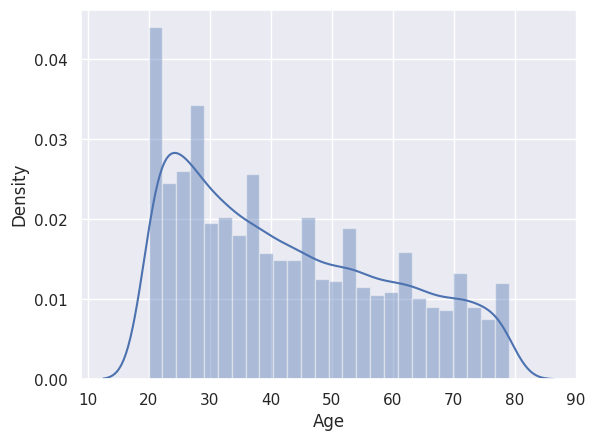

In [36]:
sns.distplot(data['Age'])

<ipython-input-40-1b173cedcd40>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

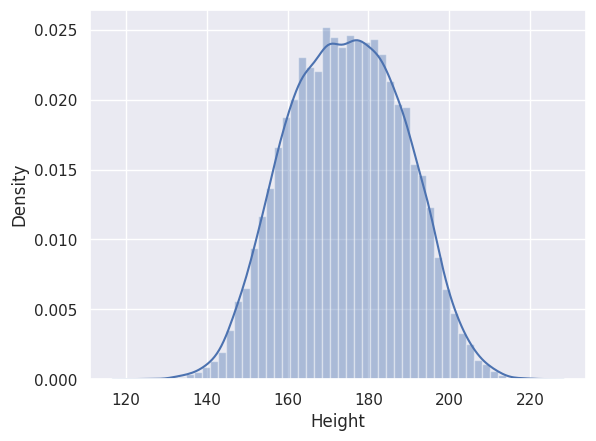

In [40]:
sns.distplot(data['Height'])

<ipython-input-41-663d24e924fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Density'>

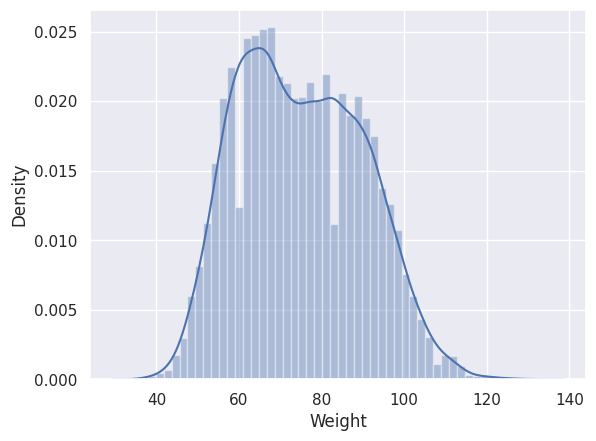

In [41]:
sns.distplot(data['Weight'])

In [42]:
correlation = data.corr()
correlation

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
User_ID,1.000000,-0.001661,-0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923
Calories,-0.001661,1.000000,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558
Gender,-0.000687,0.022357,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264
Age,-0.001827,0.154395,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175
Height,-0.013520,0.017537,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200
Weight,-0.011603,0.035481,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095
Duration,-0.002751,0.955421,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167
Heart_Rate,-0.000457,0.897882,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529
Body_Temp,0.000923,0.824558,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000


<Axes: >

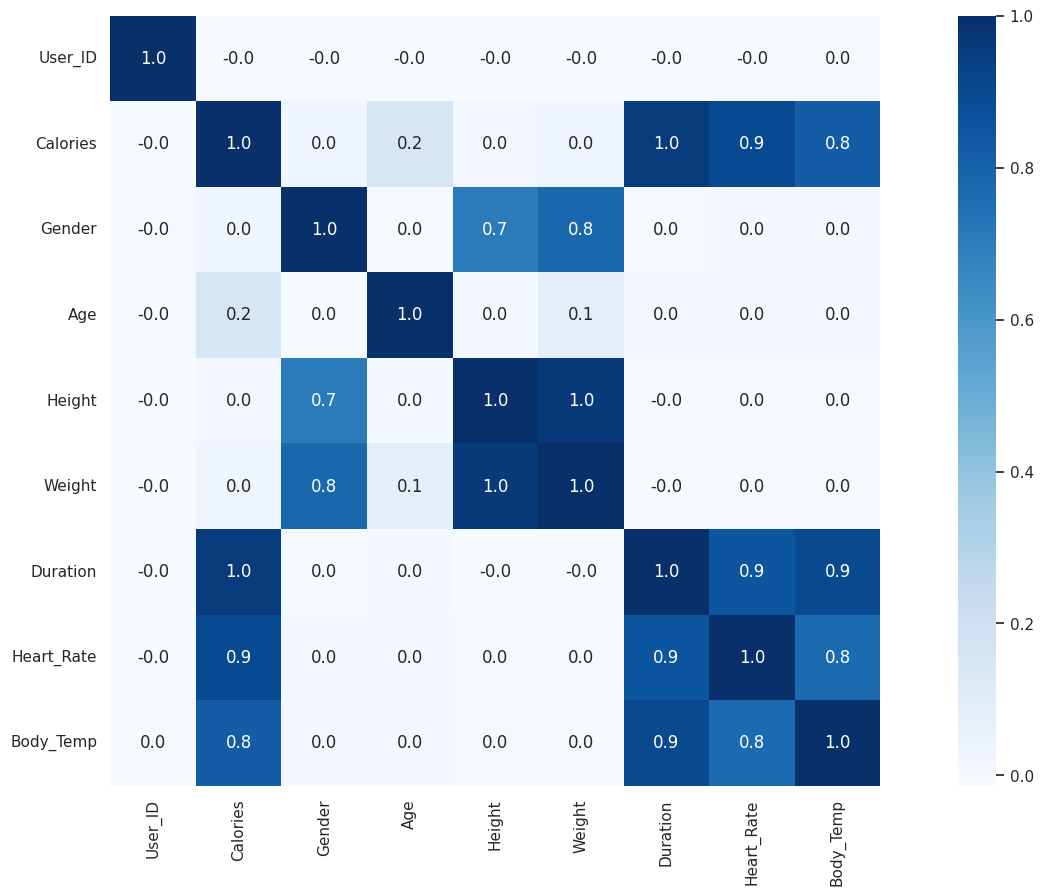

In [43]:
plt.figure(figsize = (20, 10))
sns.heatmap(correlation, cbar = True, square=True, fmt = ".1f", annot=True, cmap = 'Blues')

In [46]:
data.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [44]:
X  = data.drop(columns  = ['User_ID', 'Calories'])
y = data['Calories']

In [45]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(), ['Gender']),
    ('num', StandardScaler(), ['Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp'])
], remainder='passthrough')


pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('model', XGBRegressor())]
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [48]:
y_pred = pipeline.predict(X_test)
r2_score(y_test, y_pred)

0.9988678909361673

In [50]:
mean_absolute_error(y_test, y_pred)

1.4981198125282924

In [53]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline, X, y, cv = kfold, scoring = 'r2')
cv_results.mean()

0.9988510864545181

In [54]:
with open('pipeline_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)